<a href="https://colab.research.google.com/github/AparnaRameshA95/Assigmnents/blob/main/Aparna_Ramesh_A_Assignment_on_Model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [2]:
df =pd.read_csv('/content/titanic_dataset .csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Drop the PassengerId
df = df.drop(columns=['PassengerId','Name'])

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Checking missing values
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687
Embarked,2


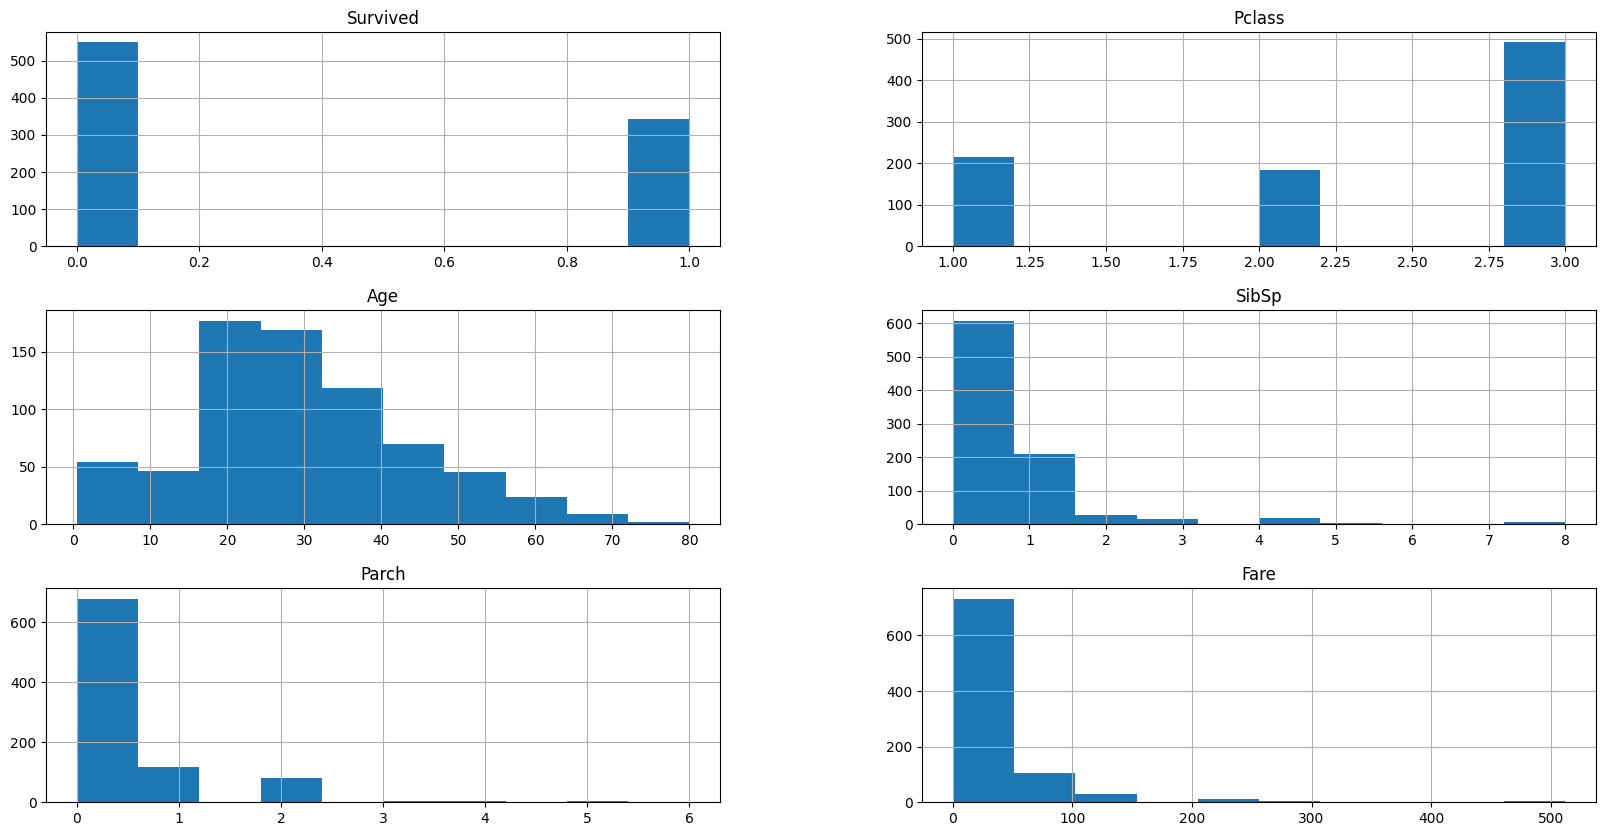

In [10]:
# frequency graph of features
df.select_dtypes(include=['float','int']).hist(figsize=(20,10))
plt.show()

In [11]:
# Handle missing values
# Age column: Replace missing values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked column: Replace missing values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Cabin column: Drop the column
df = df.drop(columns=['Cabin'])

df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


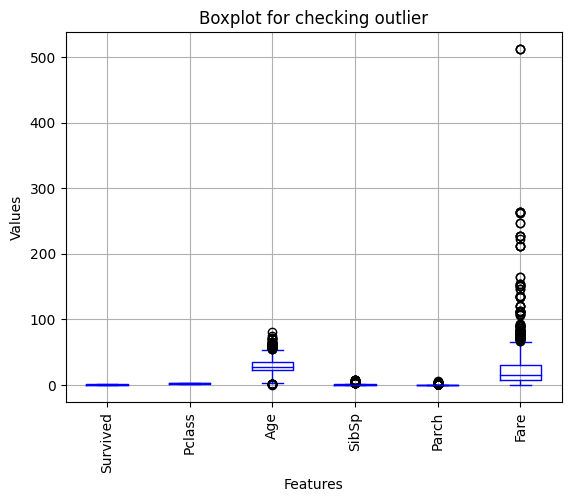

In [12]:
# Outlier checking using boxplot
df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

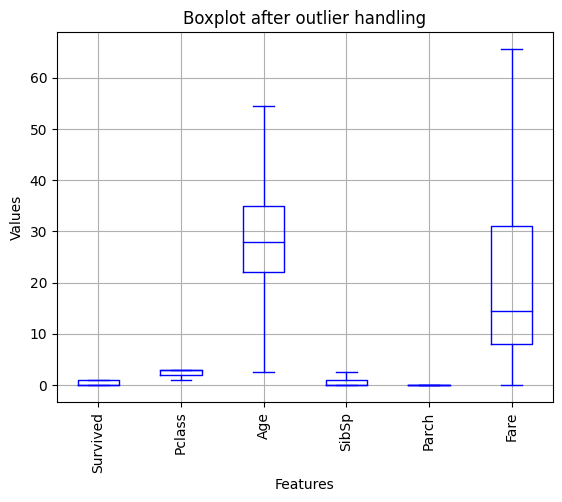

In [13]:
# Select features
features = ['Age', 'Fare', 'SibSp', 'Parch']
# Detecting outliers using IQR
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
outliers_lower = df[features]<(Q1-1.5*IQR)
outliers_upper = df[features]>(Q3 + 1.5*IQR)
# Apply capping on the selected features
for feature in features:
    df[feature] = df[feature].clip(lower=Q1[feature] - 1.5 * IQR[feature], upper=Q3[feature] + 1.5 * IQR[feature])
df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot after outlier handling')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [14]:
# Encoding categorical columns
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [24]:
# Scaling
scaler = StandardScaler()
numeric_features = df[['Age','Fare']]
# Fit the scaler on the numeric features
numeric_features.head()
scaled_features = scaler.fit_transform(numeric_features)

In [16]:
# Create the final preprocessed dataframe
processed_df = pd.DataFrame(scaled_features, columns=['Age','Fare'])
# Add other columns from the original dataframe
processed_df['Pclass'] = df['Pclass']
processed_df['Sex'] = df['Sex']
processed_df['SibSp'] = df['SibSp']
processed_df['Parch'] = df['Parch']
processed_df['Embarked'] = df['Embarked']
processed_df['Survived'] = df['Survived'].values
# Display the preprocessed dataframe
processed_df.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,-0.583432,-0.820552,3,1,1.0,0,2,0
1,0.742685,2.031623,1,0,1.0,0,0,1
2,-0.251903,-0.787578,3,0,0.0,0,2,1
3,0.494038,1.419297,1,0,1.0,0,2,1
4,0.494038,-0.781471,3,1,0.0,0,2,0


In [17]:
# Define features and target variable
X = processed_df.drop(columns=['Survived'])
y = processed_df['Survived']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


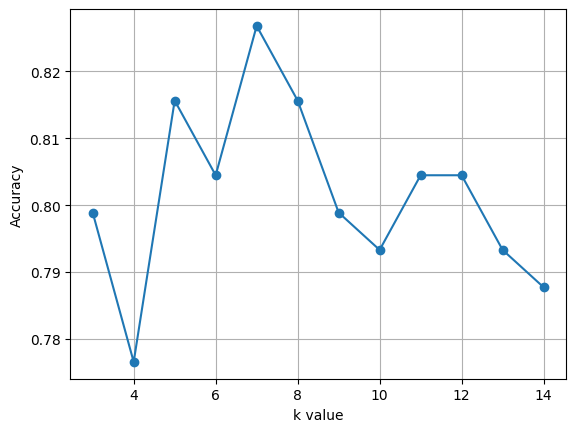

In [18]:
# Train the kNN model
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)
# Find k
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [19]:
knn_clf = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knn_clf.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)

# Evaluate the model
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))
print('Confusion matrix is', confusion_matrix(y_test, y_pred))

Accuracy is 0.7877094972067039
Precision is 0.7727272727272727
Recall is 0.6891891891891891
f1 score is 0.7285714285714284
Confusion matrix is [[90 15]
 [23 51]]


In [20]:
# Train the SVM model
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))
print('Confusion matrix is', confusion_matrix(y_test, y_pred))

Accuracy is:  0.7821229050279329
Precision is 0.7536231884057971
Recall is 0.7027027027027027
f1 score is 0.7272727272727273
Confusion matrix is [[88 17]
 [22 52]]


In [21]:
# k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# k-fold cross-validation for kNN
knn_kfold_scores = cross_val_score(knn_clf, X, y, cv=kfold, scoring='accuracy')
knn_kfold_avg_accuracy = knn_kfold_scores.mean()
# k-fold cross-validation for SVM
svm_kfold_scores = cross_val_score(svm_clf, X, y, cv=kfold, scoring='accuracy')
svm_kfold_avg_accuracy = svm_kfold_scores.mean()

In [22]:
# stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# stratified k-fold cross-validation for kNN
knn_stratified_scores = cross_val_score(knn_clf, X, y, cv=stratified_kfold, scoring='accuracy')
knn_stratified_avg_accuracy = knn_stratified_scores.mean()
# Perform stratified k-fold cross-validation for SVM
svm_stratified_scores = cross_val_score(svm_clf, X, y, cv=stratified_kfold, scoring='accuracy')
svm_stratified_avg_accuracy = svm_stratified_scores.mean()

In [23]:
# Average accuracy scores
print('kNN k-fold Average Accuracy:', knn_kfold_avg_accuracy)
print('kNN Stratified k-fold Average Accuracy:', knn_stratified_avg_accuracy )
print('SVM k-fold Average Accuracy:', svm_kfold_avg_accuracy)
print('SVM Stratified k-fold Average Accuracy:', svm_stratified_avg_accuracy)

kNN k-fold Average Accuracy: 0.80916354556804
kNN Stratified k-fold Average Accuracy: 0.8080649188514357
SVM k-fold Average Accuracy: 0.7867290886392009
SVM Stratified k-fold Average Accuracy: 0.7867041198501872
